In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

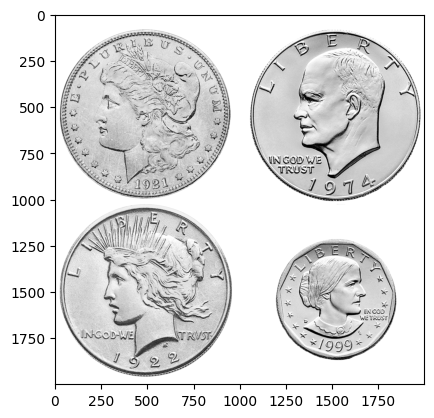

In [38]:
img = cv2.imread('images/coins2.jpg', cv2.IMREAD_COLOR)
img1 = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')
kernel = np.ones((5,5),np.uint8)


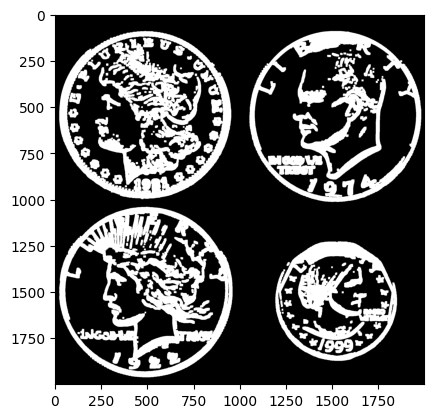

In [39]:
img = cv2.GaussianBlur(img, (11,11), 0)
img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
img = cv2.dilate(img, kernel, iterations=2)
plt.imshow(img, cmap='gray')

Number of coins: 4


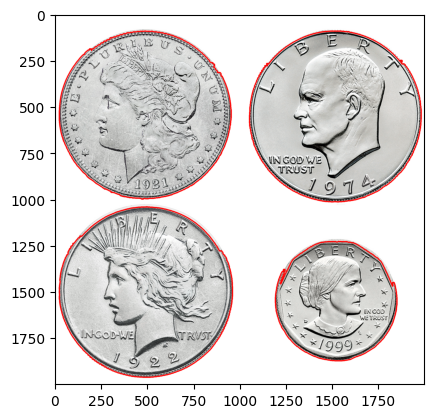

In [40]:
(cnts, _) = cv2.findContours(img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = [cnt for cnt in cnts if cv2.contourArea(cnt) > 1000]
print('Number of coins:', len(cnts))
cv2.drawContours(img1, cnts, -1, (255, 0, 0), 5)
plt.imshow(img1)